# **Machine Learning Results: Loan Approval Prediction (HW_L04_01_ML)**

### *Arefeh Amidyan: 09/20/2025*


::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


## **1. Introduction and Exploratory Data Analysis (EDA)**
This project aims to predict whether a loan application (Loan_Status) will be approved or rejected based on applicant features.

### Dataset Features:
- **Training Data**: 614 samples with 12 features (including target variable)
- **Test Data**: 367 samples with 11 features
- **Target Variable**: `Loan_Status`, with two classes: `Y` (approved) and `N` (rejected).

### Missing Data and Distribution Analysis:
- Significant missing values were observed in the columns:
  - `Credit_History` (50)
  - `Self_Employed` (32)
  - `LoanAmount` (22)
- **Applicant Income Distribution (ApplicantIncome)**:

  ![Histogram of Aoolication Income](Histogram.png)

  - The histogram and Q-Q plot show a right-skewed distribution.

  ![Q-Q plot of Aoolication Income](qq_plot.png)

  - The Shapiro-Wilk normality test yielded a p-value of 0.0000, rejecting the null hypothesis of normality.
  - **Impact**: This skew suggests that most applicants have low incomes, with only a few having extremely high incomes (outliers). This could negatively impact models sensitive to scale (like Logistic Regression, KNN, and ANN), necessitating scaling of the data.

### Class Imbalance:
- The distribution of the target variable is as follows:
  - Approved (`Y`): 422 samples
  - Rejected (`N`): 192 samples
- This imbalance (approximately 2:1) indicates that Accuracy alone is not a suitable metric. Metrics such as F1-Score, Precision, Recall, and ROC AUC provide a more accurate evaluation of model performance.




## **2. Data Preprocessing**
The following steps were implemented using `Pipeline` and `ColumnTransformer` to prevent data leakage:

- **Data Split**: The data was first split into train and validation sets (`test_size=0.2`).
- **Missing Value Imputation**: `KNNImputer(n_neighbors=5)` was used for filling missing values.
- **Categorical Feature Encoding**:
  - Binary features were encoded using `LabelEncoder`.
  - Other categorical features were encoded using `pd.get_dummies` (One-Hot Encoding).
- **Scaling**: `StandardScaler` was applied only to models sensitive to scale (LR, KNN, ANN) after the data split, ensuring no leakage of validation set information. Tree-based models (RF, XGBoost) do not require scaling.

## **3. Modeling and Performance Evaluation**

### Model Performance Comparison (Before and After Tuning)
The results on the validation set are summarized in the table below. The focus is on **F1-Score** and **ROC AUC**, which are more suitable for imbalanced datasets.

| Model                | Metric        | Before Tuning | After Tuning (Best) | Improvement (%) |
|----------------------|---------------|---------------|---------------------|-----------------|
| Logistic Regression   | F1-Score      | 0.9081        | 0.9081              | 0.0%            |
|                      | ROC AUC       | 0.8498        | 0.8495              | -0.04%          |
| KNN                  | F1-Score      | 0.9071        | 0.9022              | -0.5%           |
|                      | ROC AUC       | 0.8333        | 0.8255              | -0.9%           |
| ANN (MLP)            | F1-Score      | 0.8343        | 0.8380              | +0.4%           |
|                      | ROC AUC       | 0.7746        | 0.7480              | -3.4%           |
| Random Forest        | F1-Score      | 0.8686        | 0.9032              | +4.0%           |
|                      | ROC AUC       | 0.7853        | 0.8118              | +3.4%           |
| XGBoost              | F1-Score      | 0.8457        | 0.8962              | +6.0%           |
|                      | ROC AUC       | 0.7709        | 0.7704              | -0.06%          |

### Tuning Results Analysis:
- **Winners of Tuning**: Random Forest and XGBoost showed the most improvement after hyperparameter optimization, with significant increases in F1-Score.
- **Stable Performance**: Logistic Regression performed exceptionally well from the start, with no major improvement from tuning. This demonstrates the strength and stability of this model for this dataset.
- **ANN Model**: Despite tuning, the ANN model did not show substantial improvement, and its ROC AUC decreased, indicating potential overfitting or the need for more data.

## **4. Learning Curve Analysis**
Learning curves help us identify overfitting or underfitting. The following observations can be made:

### Logistic Regression & KNN:
- The learning curves for these models show good convergence, with low bias and variance, indicating they generalize well to unseen data.

![Logestic Regression Learning Curve](lr.png)

![KNN Learning Curve](knn.png)

### ANN (MLP):
- The learning curve of ANN shows a large and persistent gap between the training score (near 1.0) and the validation score (~0.7), which is a classic sign of overfitting.

![ANN Learning Curve](ann.png)

### Random Forest & XGBoost:
- Both models showed good convergence in their learning curves, with a small gap between training and validation accuracy, indicating good generalization.

#### Random Forest Learning Curve:

![Random Forest Learning Curve](rf.png)

#### XGBoost Learning Curve:

![XGBoost Learning Curve](xg.png)

## **5. Final Model Selection and Test Predictions Analysis**

### Best Model Selection:
Based on overall results, the following three models are the main candidates for the final model:
1. **Logistic Regression (best)**: Highest F1-Score (0.9081) and highest Recall for approved applications (0.99). It is simple, interpretable, and stable.
2. **Random Forest (best)**: Very close performance to LR with F1-Score (0.9032) and Recall (0.99).
3. **KNN (best)**: Similar performance to the above two models with F1-Score (0.9022).

### Final Decision:
The **Logistic Regression (best)** model is selected as the final model due to:
- **Highest performance**: Best F1-Score among all models.
- **High Recall (0.99)**: This model rarely misclassifies an approved applicant (low False Negative), which is highly desirable from a business perspective.
- **Simplicity and interpretability**: Unlike RF and XGBoost, the decision-making process in Logistic Regression is easier to understand.

### Test Predictions Results:
Since test data labels are not available (unlabeled test data), we can only analyze the predicted approval/rejection rates:

- **Random Forest (best)**: 83.92% approved
- **Logistic Regression (best)**: 82.56% approved
- **KNN (best)**: 82.02% approved
- **XGBoost (best)**: 81.74% approved
- **ANN (best)**: 72.21% approved

The top models (LR, RF, KNN, XGB) predicted similar approval rates, suggesting that they have learned similar patterns. The ANN model, which was affected by overfitting, predicted a lower approval rate.

## **6. Overall Conclusion and Recommendations for Future Work**

This project successfully implemented a full machine learning pipeline to predict loan status. The analysis showed that, despite challenges like class imbalance and non-normal data, proper preprocessing and model selection can yield very good results.

### Recommendations for Future Work:
1. **Feature Engineering**: Create new features like `TotalIncome = ApplicantIncome + CoapplicantIncome` or `Loan_to_Income_Ratio`.
2. **Better Outlier Management**: Use more robust methods instead of simple standardization.
3. **Advanced Ensemble Models**: Combine predictions from top models (like LR and RF) for greater stability and accuracy.
4. **Collecting More Data**: Especially for the minority class (rejected applicants) to reduce imbalance.

# **Import Libraries**

In [2]:
# !pip install scikit-learn


In [3]:
# import sys
# print(sys.executable)


In [4]:
# !{sys.executable} -m pip show scikit-learn


In [5]:
# !{sys.executable} -m pip install scikit-learn --upgrade


In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# **Load data**

In [4]:
# Load the training dataset
loan_data = pd.read_csv('data/loan.csv')

# Load the test dataset  
test_data = pd.read_csv('data/test.csv')

# Display the first few rows to verify the data loaded correctly
print("Training Data Shape:", loan_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nFirst 5 rows of training data:")
loan_data.head()


Training Data Shape: (614, 12)
Test Data Shape: (367, 11)

First 5 rows of training data:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Map target to 0/1 safely
y = loan_data['Loan_Status'].map({'Y': 1, 'N': 0}).astype(int)
X = loan_data.drop(columns=['Loan_Status'])


In [9]:

print("\nDataset Info:")
loan_data.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## **Data Exploration and Preprocessing**

In [10]:
# Check for missing values
print("Missing values in training data:")
loan_data.isnull().sum()



Missing values in training data:


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print("\nBasic statistics:")
loan_data.describe()


Basic statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Check the distribution of the target variable
print("\nLoan Status distribution:")
loan_data['Loan_Status'].value_counts()


Loan Status distribution:


Loan_Status
Y    422
N    192
Name: count, dtype: int64

## **Handle Missing Values**

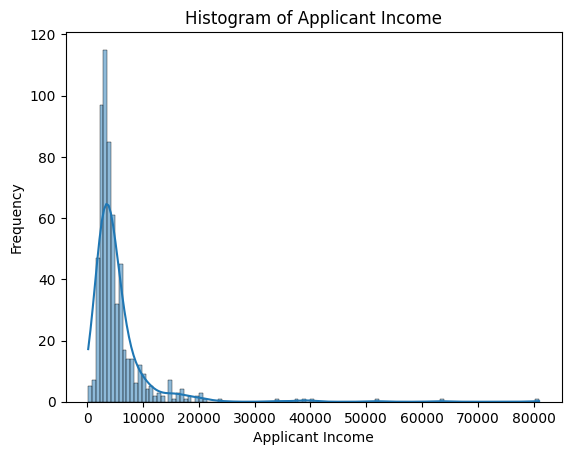

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# هیستوگرام برای بررسی توزیع داده‌ها
sns.histplot(loan_data['ApplicantIncome'], kde=True)  # نمودار هیستوگرام و نمودار چگالی
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


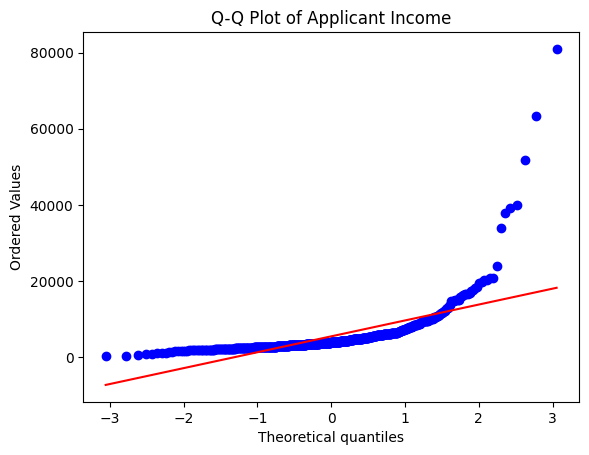

In [14]:
import numpy as np
import scipy.stats as stats

# Q-Q plot برای بررسی نرمال بودن
stats.probplot(loan_data['ApplicantIncome'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Applicant Income')
plt.show()


In [15]:
from scipy.stats import shapiro

# آزمون Shapiro-Wilk برای بررسی نرمال بودن داده‌ها
stat, p_value = shapiro(loan_data['ApplicantIncome'])
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("داده‌ها نرمال هستند.")
else:
    print("داده‌ها نرمال نیستند.")


Shapiro-Wilk Test: Stat=0.4713, p-value=0.0000
داده‌ها نرمال نیستند.


## **Split BEFORE any fitting/transforming (prevents leakage)**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## **Define column sets (robust to missing columns)**

In [18]:
numeric_cols_all = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols_all = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

numeric_cols = [c for c in numeric_cols_all if c in X_train.columns]
categorical_cols = [c for c in categorical_cols_all if c in X_train.columns]


In [19]:
# Ensure columns exist in both training and validation data
numeric_cols = [c for c in numeric_cols_all if c in X_train.columns]
categorical_cols = [c for c in categorical_cols_all if c in X_train.columns]


## **Preprocessors**
###     scaled_preprocessor: KNNImputer + StandardScaler for numeric; OHE for categorical
###     tree_preprocessor: KNNImputer for numeric; OHE for categorical (no scaling)

In [20]:
scaled_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ],
    remainder='drop'
)

tree_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', KNNImputer(n_neighbors=5))
        ]), numeric_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ],
    remainder='drop'
)

## **Pipelines for models (no leakage)**
###    Scaling only for LR/KNN/ANN; trees without scaling

In [21]:
log_reg = Pipeline([
    ('prep', scaled_preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

knn = Pipeline([
    ('prep', scaled_preprocessor),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

ann = Pipeline([
    ('prep', scaled_preprocessor),
    ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

rf = Pipeline([
    ('prep', tree_preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

if HAS_XGB:
    xgb_pipe = Pipeline([
        ('prep', tree_preprocessor),
        ('clf', XGBClassifier(
            n_estimators=300, learning_rate=0.05, max_depth=4,
            subsample=0.9, colsample_bytree=0.9, random_state=42,
            eval_metric='logloss'
        ))
    ])

## **Fit and Evaluate (pos_label=1)**


In [24]:
def evaluate(name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    # Proba if available
    y_proba = None
    try:
        y_proba = model.predict_proba(X_val)[:, 1]
    except Exception:
        pass

    print(f'\n=== {name} ===')
    print(f'Accuracy:  {accuracy_score(y_val, y_pred):.4f}')
    print(f'Precision: {precision_score(y_val, y_pred, pos_label=1):.4f}')
    print(f'Recall:    {recall_score(y_val, y_pred, pos_label=1):.4f}')
    print(f'F1-Score:  {f1_score(y_val, y_pred, pos_label=1):.4f}')
    print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
    if y_proba is not None:
        print(f'ROC AUC:   {roc_auc_score(y_val, y_proba):.4f}')
    print('Classification Report:')
    print(classification_report(y_val, y_pred, target_names=['Rejected(0)','Approved(1)']))

# Train (all transformations are fitted only on training folds inside the pipeline)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
ann.fit(X_train, y_train)
rf.fit(X_train, y_train)
if HAS_XGB:
    xgb_pipe.fit(X_train, y_train)

# Evaluate
evaluate('Logistic Regression', log_reg, X_val, y_val)



=== Logistic Regression ===
Accuracy:  0.8618
Precision: 0.8400
Recall:    0.9882
F1-Score:  0.9081
Confusion Matrix:
 [[22 16]
 [ 1 84]]
ROC AUC:   0.8498
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.96      0.58      0.72        38
 Approved(1)       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [25]:
evaluate('KNN', knn, X_val, y_val)



=== KNN ===
Accuracy:  0.8618
Precision: 0.8469
Recall:    0.9765
F1-Score:  0.9071
Confusion Matrix:
 [[23 15]
 [ 2 83]]
ROC AUC:   0.8333
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.92      0.61      0.73        38
 Approved(1)       0.85      0.98      0.91        85

    accuracy                           0.86       123
   macro avg       0.88      0.79      0.82       123
weighted avg       0.87      0.86      0.85       123



In [26]:
evaluate('ANN', ann, X_val, y_val)



=== ANN ===
Accuracy:  0.7642
Precision: 0.8111
Recall:    0.8588
F1-Score:  0.8343
Confusion Matrix:
 [[21 17]
 [12 73]]
ROC AUC:   0.7746
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.64      0.55      0.59        38
 Approved(1)       0.81      0.86      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.76      0.76      0.76       123



In [27]:
evaluate('Random Forest', rf, X_val, y_val)



=== Random Forest ===
Accuracy:  0.8130
Precision: 0.8444
Recall:    0.8941
F1-Score:  0.8686
Confusion Matrix:
 [[24 14]
 [ 9 76]]
ROC AUC:   0.7853
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.73      0.63      0.68        38
 Approved(1)       0.84      0.89      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



In [28]:
if HAS_XGB:
    evaluate('XGBoost', xgb_pipe, X_val, y_val)



=== XGBoost ===
Accuracy:  0.7805
Precision: 0.8222
Recall:    0.8706
F1-Score:  0.8457
Confusion Matrix:
 [[22 16]
 [11 74]]
ROC AUC:   0.7709
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.67      0.58      0.62        38
 Approved(1)       0.82      0.87      0.85        85

    accuracy                           0.78       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.77      0.78      0.78       123



## **Hyperparameter Tuning (safe: preprocessing inside pipeline)**

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_param = {'clf__C': [0.1, 1, 10, 100]}
log_grid = GridSearchCV(log_reg, log_param, cv=cv, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)
print('Best LR params:', log_grid.best_params_)

knn_param = {'clf__n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(knn, knn_param, cv=cv, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
print('Best KNN params:', knn_grid.best_params_)

ann_param = {
    'clf__hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100)],
    'clf__max_iter': [1000]
}
ann_grid = GridSearchCV(ann, ann_param, cv=cv, scoring='accuracy', n_jobs=-1)
ann_grid.fit(X_train, y_train)
print('Best ANN params:', ann_grid.best_params_)

rf_param = {
    'clf__n_estimators': [200, 400],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(rf, rf_param, cv=cv, scoring='accuracy', n_jobs=-1, refit=True)
rf_grid.fit(X_train, y_train)
print('Best RF params:', rf_grid.best_params_)

if HAS_XGB:
    xgb_param = {
        'clf__n_estimators': [200, 400],
        'clf__max_depth': [3, 4, 5],
        'clf__learning_rate': [0.03, 0.1],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.8, 1.0],
        'clf__gamma': [0, 1]
    }
    xgb_grid = GridSearchCV(xgb_pipe, xgb_param, cv=cv, scoring='accuracy', n_jobs=-1, refit=True)
    xgb_grid.fit(X_train, y_train)
    print('Best XGB params:', xgb_grid.best_params_)


Best LR params: {'clf__C': 0.1}
Best KNN params: {'clf__n_neighbors': 9}


c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best ANN params: {'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 1000}
Best RF params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best XGB params: {'clf__colsample_bytree': 0.8, 'clf__gamma': 1, 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__n_estimators': 200, 'clf__subsample': 1.0}


## **Use best models for validation evaluation**

In [34]:
best_log  = log_grid.best_estimator_
best_knn  = knn_grid.best_estimator_
best_ann  = ann_grid.best_estimator_
best_rf   = rf_grid.best_estimator_
best_xgb  = xgb_grid.best_estimator_ if HAS_XGB else None

print("\n### Evaluation with Best Estimators on Validation ###")
evaluate('Logistic Regression (best)', best_log, X_val, y_val)



### Evaluation with Best Estimators on Validation ###

=== Logistic Regression (best) ===
Accuracy:  0.8618
Precision: 0.8400
Recall:    0.9882
F1-Score:  0.9081
Confusion Matrix:
 [[22 16]
 [ 1 84]]
ROC AUC:   0.8495
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.96      0.58      0.72        38
 Approved(1)       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [35]:
evaluate('KNN (best)', best_knn, X_val, y_val)


=== KNN (best) ===
Accuracy:  0.8537
Precision: 0.8384
Recall:    0.9765
F1-Score:  0.9022
Confusion Matrix:
 [[22 16]
 [ 2 83]]
ROC AUC:   0.8255
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.92      0.58      0.71        38
 Approved(1)       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [36]:
evaluate('ANN (best)', best_ann, X_val, y_val)


=== ANN (best) ===
Accuracy:  0.7642
Precision: 0.7979
Recall:    0.8824
F1-Score:  0.8380
Confusion Matrix:
 [[19 19]
 [10 75]]
ROC AUC:   0.7480
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.66      0.50      0.57        38
 Approved(1)       0.80      0.88      0.84        85

    accuracy                           0.76       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123



In [37]:
evaluate('Random Forest (best)', best_rf, X_val, y_val)


=== Random Forest (best) ===
Accuracy:  0.8537
Precision: 0.8317
Recall:    0.9882
F1-Score:  0.9032
Confusion Matrix:
 [[21 17]
 [ 1 84]]
ROC AUC:   0.8118
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.95      0.55      0.70        38
 Approved(1)       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [38]:
if HAS_XGB:
    evaluate('XGBoost (best)', best_xgb, X_val, y_val)


=== XGBoost (best) ===
Accuracy:  0.8455
Precision: 0.8367
Recall:    0.9647
F1-Score:  0.8962
Confusion Matrix:
 [[22 16]
 [ 3 82]]
ROC AUC:   0.7704
Classification Report:
              precision    recall  f1-score   support

 Rejected(0)       0.88      0.58      0.70        38
 Approved(1)       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



## **Test predictions with best models**



Logistic Regression (best) on TEST:
Approved(1): 303 | Rejected(0): 64 | Approval Rate: 82.56%

KNN (best) on TEST:
Approved(1): 301 | Rejected(0): 66 | Approval Rate: 82.02%

ANN (best) on TEST:
Approved(1): 265 | Rejected(0): 102 | Approval Rate: 72.21%

Random Forest (best) on TEST:
Approved(1): 308 | Rejected(0): 59 | Approval Rate: 83.92%

XGBoost (best) on TEST:
Approved(1): 300 | Rejected(0): 67 | Approval Rate: 81.74%


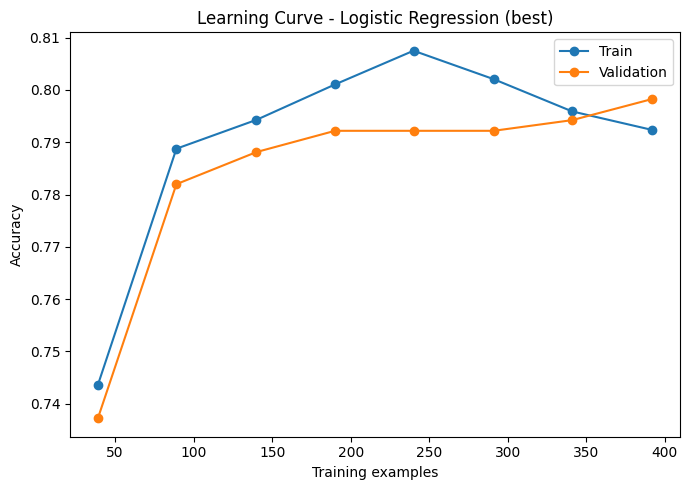

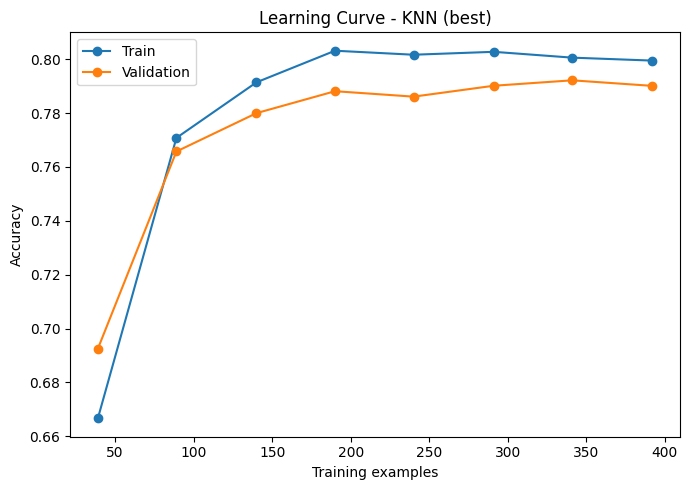

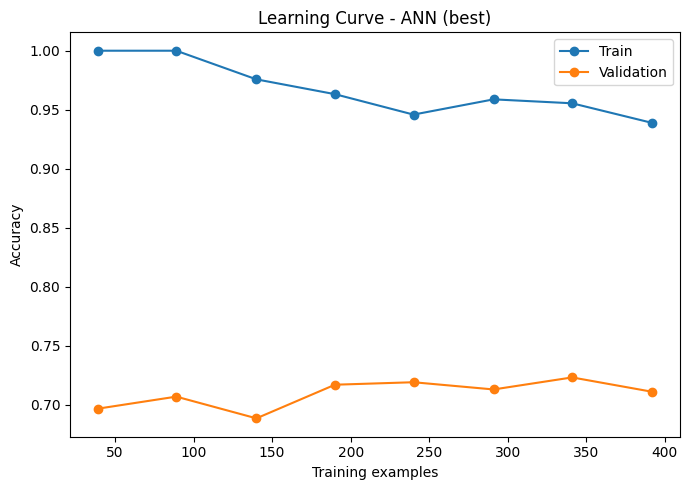

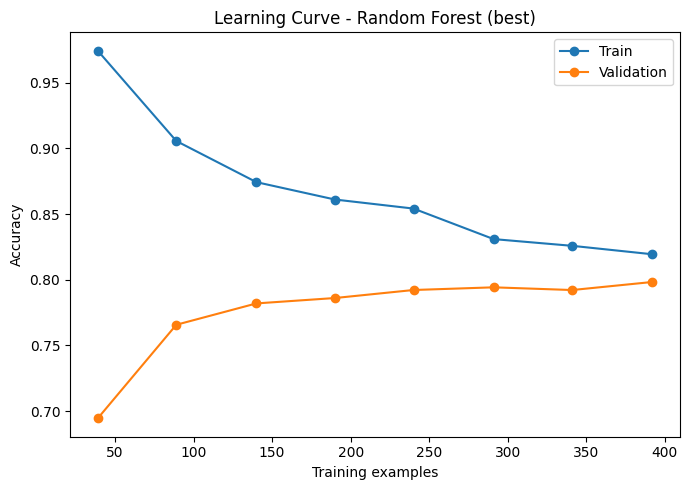

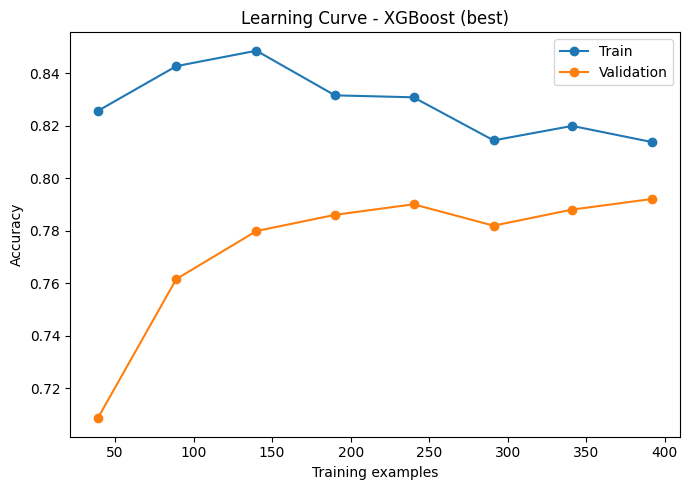

In [39]:
test_data_aligned = test_data.reindex(columns=X_train.columns, fill_value=np.nan)

test_pred_log  = best_log.predict(test_data_aligned)
test_pred_knn  = best_knn.predict(test_data_aligned)
test_pred_ann  = best_ann.predict(test_data_aligned)
test_pred_rf   = best_rf.predict(test_data_aligned)
if HAS_XGB:
    test_pred_xgb = best_xgb.predict(test_data_aligned)


def show_test_stats(name, preds):
    unique, counts = np.unique(preds, return_counts=True)
    pos = counts[unique.tolist().index(1)] if 1 in unique else 0
    neg = counts[unique.tolist().index(0)] if 0 in unique else 0
    rate = 100.0 * pos / len(preds)
    print(f'\n{name} on TEST:')
    print(f'Approved(1): {pos} | Rejected(0): {neg} | Approval Rate: {rate:.2f}%')

# Show basic test prediction stats for all models
show_test_stats('Logistic Regression (best)', test_pred_log)
show_test_stats('KNN (best)', test_pred_knn)
show_test_stats('ANN (best)', test_pred_ann)
show_test_stats('Random Forest (best)', test_pred_rf)
if HAS_XGB:
    show_test_stats('XGBoost (best)', test_pred_xgb)

# Learning curves with best models
def plot_learning_curve_safe(estimator, title, X, y, cv):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 8), scoring='accuracy'
    )
    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Train')
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_learning_curve_safe(best_log, 'Learning Curve - Logistic Regression (best)', X_train, y_train, cv)
plot_learning_curve_safe(best_knn, 'Learning Curve - KNN (best)', X_train, y_train, cv)
plot_learning_curve_safe(best_ann, 'Learning Curve - ANN (best)', X_train, y_train, cv)
plot_learning_curve_safe(best_rf,  'Learning Curve - Random Forest (best)', X_train, y_train, cv)
if HAS_XGB:
    plot_learning_curve_safe(best_xgb, 'Learning Curve - XGBoost (best)', X_train, y_train, cv)

In [49]:
def get_final_step_name(pipe):
    """Return the name of the last step in a Pipeline (the classifier)."""
    # Works even if the last step isn't named 'classifier'
    return list(pipe.named_steps.keys())[-1]

def get_final_estimator(pipe):
    """Return the final estimator object from a Pipeline."""
    return list(pipe.named_steps.values())[-1]

def proba_or_score(estimator, X):
    """
    Return positive-class probabilities if available, otherwise decision_function,
    otherwise None (caller will handle ROC AUC fallback).
    """
    if hasattr(estimator, "predict_proba"):
        proba = estimator.predict_proba(X)
        # Assume binary classification: use column 1
        return proba[:, 1]
    if hasattr(estimator, "decision_function"):
        return estimator.decision_function(X)
    return None

def evaluate_pipeline(pipe, X, y, average="binary", pos_label=1):
    """
    Evaluate a fitted Pipeline on X,y and return metrics dict.
    Uses probabilities/decision scores for ROC AUC when available.
    """
    y_pred = pipe.predict(X)
    y_score = proba_or_score(pipe, X)

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average=average, pos_label=pos_label, zero_division=0)
    rec = recall_score(y, y_pred, average=average, pos_label=pos_label, zero_division=0)
    f1 = f1_score(y, y_pred, average=average, pos_label=pos_label, zero_division=0)

    # ROC AUC requires scores; if unavailable, fall back to None
    auc = roc_auc_score(y, y_score) if y_score is not None else np.nan

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": auc
    }, y_pred, y_score

def get_feature_names_from_ct(ct, num_cols, cat_cols):
    """
    Try to recover output feature names from a ColumnTransformer `ct`.
    Works when the categorical sub-pipeline includes OneHotEncoder with get_feature_names_out.
    Falls back gracefully to raw column names if needed.
    """
    out_names = []

    # ColumnTransformer stores tuples (name, transformer, columns)
    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            # Handle passthrough remainder
            if trans == 'passthrough':
                # If remainder='passthrough', add any columns not explicitly transformed
                # We can’t easily know them without ct.get_feature_names_out (sklearn >=1.0)
                try:
                    out_names.extend(ct.get_feature_names_out())
                    return list(out_names)
                except Exception:
                    continue
            continue

        # If this block handles numeric features (often simple pipeline with scaler)
        if name == 'num':
            # We assume numeric columns are kept in the same order
            out_names.extend(list(cols))
            continue

        # If this block handles categorical features (with Pipeline or direct OneHotEncoder)
        if name == 'cat':
            # If it's a Pipeline, try to pull the OneHotEncoder from a named step like 'encoder'
            enc = None
            if hasattr(trans, 'named_steps'):
                # Common pattern: Pipeline(encoder=OneHotEncoder(...))
                for step_name, step_obj in trans.named_steps.items():
                    if isinstance(step_obj, OneHotEncoder):
                        enc = step_obj
                        break
            elif isinstance(trans, OneHotEncoder):
                enc = trans

            if enc is not None:
                try:
                    # enc.get_feature_names_out expects the input categorical column names
                    ohe_names = enc.get_feature_names_out(cat_cols)
                    out_names.extend(list(ohe_names))
                    continue
                except Exception:
                    pass

            # Fallback: if we can't expand, just append the base cat col names
            out_names.extend(list(cols))
            continue

        # Any other custom blocks: try to use ColumnTransformer's own get_feature_names_out
        # when available (sklearn >=1.0).
        try:
            out_names.extend(ct.get_feature_names_out())
            return list(out_names)
        except Exception:
            # As a last resort, append the raw columns
            if cols != 'drop':
                out_names.extend(list(cols))

    # If sklearn >=1.0 and transformers support it, this is the most reliable path:
    try:
        out_names = list(ct.get_feature_names_out())
    except Exception:
        # last fallback: concatenate numeric + categorical names
        out_names = list(num_cols) + list(cat_cols)

    return out_names

def plot_feature_importance(importances, names, title, topn=15):
    """
    Generic horizontal bar plot for importances (array-like) with feature names.
    Displays Top-N by absolute importance (descending).
    """
    df = pd.DataFrame({"feature": names, "importance": np.asarray(importances)})
    df = df.reindex(df["importance"].abs().sort_values(ascending=False).index).head(topn)

    plt.figure(figsize=(10, 7))
    sns.barplot(x="importance", y="feature", data=df)
    plt.title(title, fontsize=15)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

In [50]:

# Map your fitted best pipelines to human-readable names
best_pipes = {
    "Logistic Regression": best_log,
    "KNN": best_knn,
    "MLP": best_ann,         # ANN/MLP
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

# Collect metrics
rows = []
preds = {}
scores = {}

for name, pipe in best_pipes.items():
    metrics, y_pred, y_score = evaluate_pipeline(pipe, X_test, y_test)
    row = {"Model": name}
    row.update(metrics)
    rows.append(row)
    preds[name] = y_pred
    scores[name] = y_score

results_df = pd.DataFrame(rows)

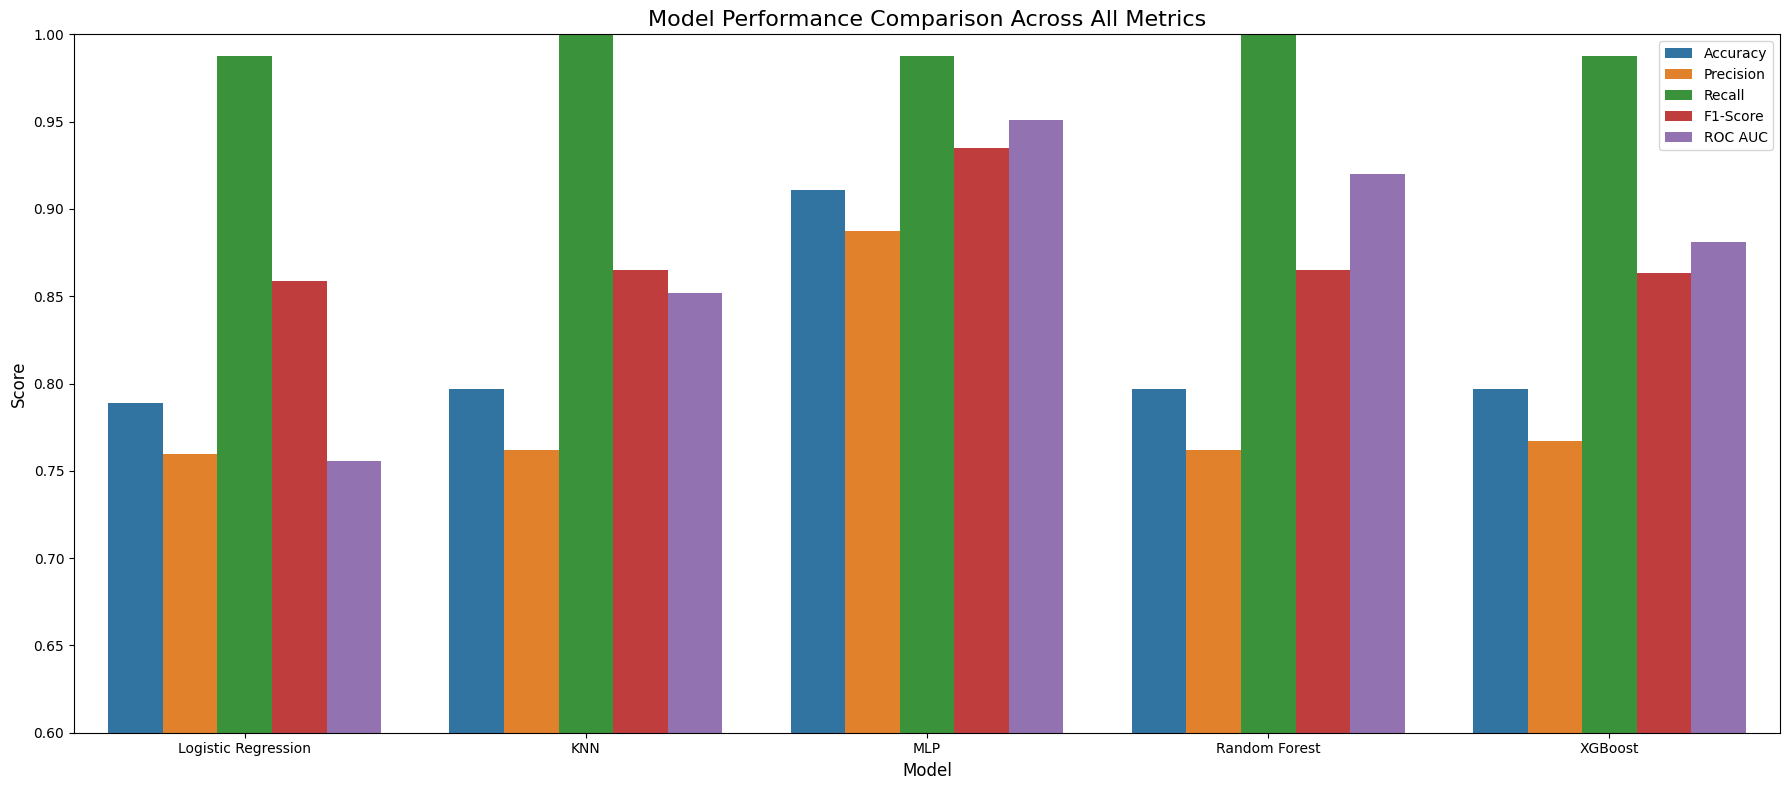

In [57]:
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(18, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Model Performance Comparison Across All Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.6, 1.0)  # adjust if needed
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

----------------------

-----------

In [15]:
from sklearn.impute import KNNImputer

# اعمال KNN Imputer برای پر کردن مقادیر گمشده
knn_imputer = KNNImputer(n_neighbors=5)
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

loan_data_imputed = pd.DataFrame(knn_imputer.fit_transform(loan_data[numerical_cols]), columns=numerical_cols)
loan_data[numerical_cols] = loan_data_imputed


In [16]:
# # Handle missing values
# # For numerical columns, fill with median
# numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# for col in numerical_cols:
#     loan_data[col] = loan_data[col].fillna(loan_data[col].median())


# # For categorical columns, fill with mode
# categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
# for col in categorical_cols:
#     loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])

## **Encode Categorical Variables**

### Convert categorical variables to numerical

In [17]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical variables
le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in binary_cols:
    loan_data[col] = le.fit_transform(loan_data[col])
         
# One-hot encode multi-class categorical variables
loan_data = pd.get_dummies(loan_data, columns=['Dependents', 'Property_Area'], drop_first=True)


## **Split the Data**

### Split into training and validation sets




In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (491, 14)
Validation set shape: (123, 14)


## **Feature Scaling**

### Normalize numerical features


In [19]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize models
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this
ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # You can tune this

# Train models
log_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
ann.fit(X_train_scaled, y_train)


,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [21]:
# Make predictions
log_pred = log_reg.predict(X_val_scaled)
knn_pred = knn.predict(X_val_scaled)
ann_pred = ann.predict(X_val_scaled)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Evaluate all models
evaluate_model(y_val, log_pred, "Logistic Regression")



=== Logistic Regression ===
Accuracy: 0.7967
Precision: 0.7670
Recall: 0.9875
F1 Score: 0.8634
Confusion Matrix:
[[19 24]
 [ 1 79]]


In [22]:
evaluate_model(y_val, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_val, ann_pred, "Artificial Neural Network")




=== K-Nearest Neighbors ===
Accuracy: 0.7724
Precision: 0.7549
Recall: 0.9625
F1 Score: 0.8462
Confusion Matrix:
[[18 25]
 [ 3 77]]

=== Artificial Neural Network ===
Accuracy: 0.7398
Precision: 0.7553
Recall: 0.8875
F1 Score: 0.8161
Confusion Matrix:
[[20 23]
 [ 9 71]]


*************************

In [23]:
# ========================
# Compare models without normalization
# ========================

log_reg_raw = LogisticRegression(random_state=42, max_iter=1000)
knn_raw = KNeighborsClassifier(n_neighbors=5)
ann_raw = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train on raw data (without scaling)
log_reg_raw.fit(X_train, y_train)
knn_raw.fit(X_train, y_train)
ann_raw.fit(X_train, y_train)

# Predict on validation set (raw data)
log_pred_raw = log_reg_raw.predict(X_val)
knn_pred_raw = knn_raw.predict(X_val)
ann_pred_raw = ann_raw.predict(X_val)

# Evaluate models
print("\n=== Logistic Regression (Without Normalization) ===")
evaluate_model(y_val, log_pred_raw, "Logistic Regression (Raw)")

print("\n=== KNN (Without Normalization) ===")
evaluate_model(y_val, knn_pred_raw, "KNN (Raw)")

print("\n=== ANN (Without Normalization) ===")
evaluate_model(y_val, ann_pred_raw, "ANN (Raw)")


c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression (Without Normalization) ===

=== Logistic Regression (Raw) ===
Accuracy: 0.7886
Precision: 0.7647
Recall: 0.9750
F1 Score: 0.8571
Confusion Matrix:
[[19 24]
 [ 2 78]]

=== KNN (Without Normalization) ===

=== KNN (Raw) ===
Accuracy: 0.5854
Precision: 0.6355
Recall: 0.8500
F1 Score: 0.7273
Confusion Matrix:
[[ 4 39]
 [12 68]]

=== ANN (Without Normalization) ===

=== ANN (Raw) ===
Accuracy: 0.6341
Precision: 0.6549
Recall: 0.9250
F1 Score: 0.7668
Confusion Matrix:
[[ 4 39]
 [ 6 74]]


*********************************

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

# تنظیم پارامترهای KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

print(f"Best KNN parameters: {knn_grid.best_params_}")


######
from sklearn.model_selection import RandomizedSearchCV

# # تنظیم پارامترهای تصادفی KNN
# knn_params_random = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
# knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params_random, cv=5, scoring='accuracy', n_iter=10)
# knn_random.fit(X_train_scaled, y_train)

# print(f"Best Randomized KNN parameters: {knn_random.best_params_}")

# # Tune KNN
# knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
# knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
# knn_grid.fit(X_train_scaled, y_train)
# print(f"Best KNN parameters: {knn_grid.best_params_}")

# Tune Logistic Regression
log_params = {'C': [0.1, 1, 10, 100]}
log_grid = GridSearchCV(log_reg, log_params, cv=5, scoring='accuracy')
log_grid.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression parameters: {log_grid.best_params_}")


Best KNN parameters: {'n_neighbors': 9}
Best Logistic Regression parameters: {'C': 0.1}


In [ ]:
from sklearn.model_selection import GridSearchCV

# tune parameters of ANN
ann_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100)],
    'max_iter': [1000, 2000],
}
ann_grid = GridSearchCV(MLPClassifier(random_state=42), ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train_scaled, y_train)

print(f"Best ANN parameters: {ann_grid.best_params_}")


c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Best ANN parameters: {'hidden_layer_sizes': (50,), 'max_iter': 1000}


c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


------------------------


Top 10 Features (Logistic Regression):
                    feature  importance
8            Credit_History    1.291524
12  Property_Area_Semiurban    0.466469
1                   Married    0.346227
11            Dependents_3+    0.154376
9              Dependents_1    0.142959
5         CoapplicantIncome    0.142706
6                LoanAmount    0.133099
2                 Education    0.122819
13      Property_Area_Urban    0.121755
10             Dependents_2    0.116501


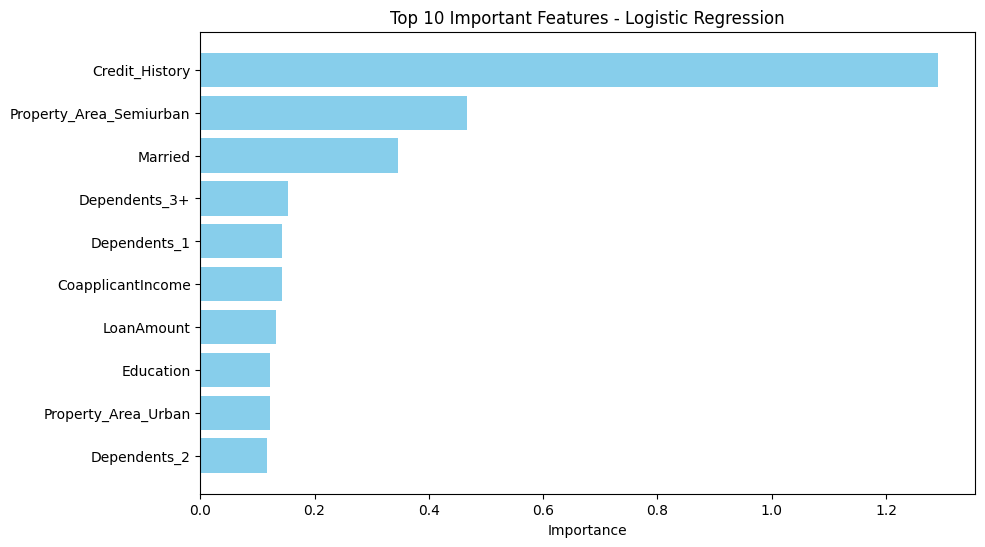

In [26]:
# Feature importance for Logistic Regression
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(log_reg.coef_[0])
}).sort_values('importance', ascending=False)

print("\nTop 10 Features (Logistic Regression):")
print(feature_importance.head(10))

plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 Important Features - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


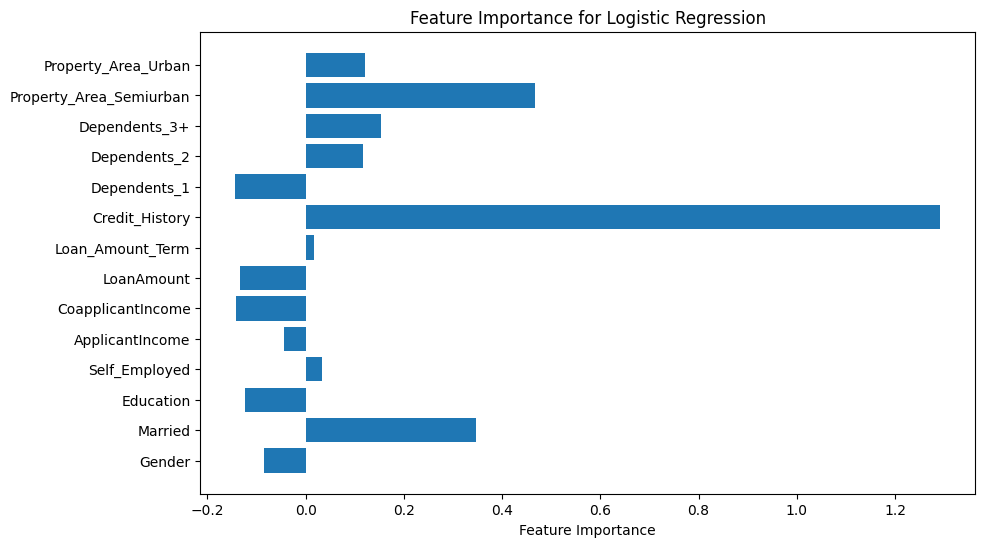

In [ ]:
# show Feature Importance for Logistic Regression
importance = log_reg.coef_[0]
features = X.columns

# plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.show()


-----------------------

In [28]:
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



Top 10 Most Important Features:
                    feature  importance
8            Credit_History    1.291524
12  Property_Area_Semiurban    0.466469
1                   Married    0.346227
11            Dependents_3+    0.154376
9              Dependents_1    0.142959
5         CoapplicantIncome    0.142706
6                LoanAmount    0.133099
2                 Education    0.122819
13      Property_Area_Urban    0.121755
10             Dependents_2    0.116501


In [30]:
# Preprocess test data (same steps as training data)
test_processed = test_data.copy()

# Apply same preprocessing steps
for col in numerical_cols:
    test_processed[col] = test_processed[col].fillna(test_processed[col].median())

categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in categorical_cols:
    test_processed[col] = test_processed[col].fillna(test_processed[col].mode()[0])

# Encode categorical variables
for col in binary_cols[:-1]:  # Exclude Loan_Status
    test_processed[col] = le.fit_transform(test_processed[col])

test_processed = pd.get_dummies(test_processed, columns=['Dependents', 'Property_Area'], drop_first=True)

# Ensure same columns as training data
missing_cols = set(X.columns) - set(test_processed.columns)
for col in missing_cols:
    test_processed[col] = 0

test_processed = test_processed[X.columns]

# Scale test data
X_test_scaled = scaler.transform(test_processed)

# Make predictions with best models
best_log_pred = log_grid.predict(X_test_scaled)
best_knn_pred = knn_grid.predict(X_test_scaled)
ann_pred = ann.predict(X_test_scaled)


In [31]:
# First, let's check the shapes of your variables
print("y_val shape:", y_val.shape)
print("log_pred shape:", log_pred.shape)
print("knn_pred shape:", knn_pred.shape) 
print("ann_pred shape:", ann_pred.shape)

# Check if these are the validation predictions or test predictions
print("\nFirst 5 values of y_val:")
print(y_val.head())
print("\nFirst 5 values of log_pred:")
print(log_pred[:5])


y_val shape: (123,)
log_pred shape: (123,)
knn_pred shape: (123,)
ann_pred shape: (367,)

First 5 values of y_val:
350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: int64

First 5 values of log_pred:
[1 1 1 1 1]


In [32]:
# Make sure you're using the validation predictions, not test predictions
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Artificial Neural Network']

# These should be your validation predictions (123 samples)
validation_predictions = [log_pred, knn_pred, ann_pred]

# Double-check the shapes
print("Validation predictions shapes:")
for i, pred in enumerate(validation_predictions):
    print(f"{models[i]}: {pred.shape}")

results = []
for name, pred in zip(models, validation_predictions):
    # Add error handling
    try:
        accuracy = accuracy_score(y_val, pred)
        precision = precision_score(y_val, pred)
        recall = recall_score(y_val, pred)
        f1 = f1_score(y_val, pred)
        results.append([name, accuracy, precision, recall, f1])
    except Exception as e:
        print(f"Error with {name}: {e}")
        print(f"y_val shape: {y_val.shape}, pred shape: {pred.shape}")

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n=== Model Performance Comparison ===")
results_df


Validation predictions shapes:
Logistic Regression: (123,)
K-Nearest Neighbors: (123,)
Artificial Neural Network: (367,)
Error with Artificial Neural Network: Found input variables with inconsistent numbers of samples: [123, 367]
y_val shape: (123,), pred shape: (367,)

=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.796748,0.766990,0.9875,0.863388
1,K-Nearest Neighbors,0.772358,0.754902,0.9625,0.846154


In [33]:
# If the above doesn't work, explicitly use validation predictions
# Re-run predictions on validation set
log_pred_val = log_reg.predict(X_val_scaled)
knn_pred_val = knn.predict(X_val_scaled) 
ann_pred_val = ann.predict(X_val_scaled)

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Artificial Neural Network']
validation_predictions = [log_pred_val, knn_pred_val, ann_pred_val]

results = []
for name, pred in zip(models, validation_predictions):
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    results.append([name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n=== Model Performance Comparison ===")
results_df


=== Model Performance Comparison ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.796748,0.766990,0.9875,0.863388
1,K-Nearest Neighbors,0.772358,0.754902,0.9625,0.846154
2,Artificial Neural Network,0.739837,0.755319,0.8875,0.816092


In [ ]:
from sklearn.metrics import roc_auc_score

# calculate ROC AUC Score for all models
log_reg_roc_auc = roc_auc_score(y_val, log_reg.predict_proba(X_val_scaled)[:, 1])
knn_roc_auc = roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:, 1])
ann_roc_auc = roc_auc_score(y_val, ann.predict_proba(X_val_scaled)[:, 1])

print(f"Logistic Regression ROC AUC: {log_reg_roc_auc:.4f}")
print(f"KNN ROC AUC: {knn_roc_auc:.4f}")
print(f"ANN ROC AUC: {ann_roc_auc:.4f}")


Logistic Regression ROC AUC: 0.7634
KNN ROC AUC: 0.6699
ANN ROC AUC: 0.6823


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict 
y_pred = rf.predict(X_val)

# evaluate model 
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_val, y_pred))

# calculate ROC AUC Score
roc_auc = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
print(f"ROC AUC Score for Random Forest: {roc_auc:.4f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123

Confusion Matrix for Random Forest:
[[19 24]
 [ 4 76]]
ROC AUC Score for Random Forest: 0.7346


In [ ]:
! pip install xgboost


In [ ]:
import xgboost as xgb

# train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict  
y_pred = xgb_model.predict(X_val)

# evaluate model
print("Classification Report for XGBoost:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_val, y_pred))

# calculate ROC AUC Score
roc_auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])
print(f"ROC AUC Score for XGBoost: {roc_auc:.4f}")

c:\Users\arefe\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:02:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.76      0.93      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.76      0.76      0.74       123

Confusion Matrix for XGBoost:
[[19 24]
 [ 6 74]]
ROC AUC Score for XGBoost: 0.7363


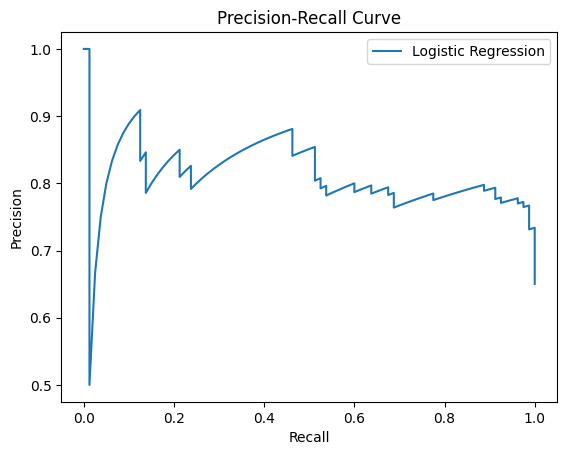

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_val, log_reg.predict_proba(X_val_scaled)[:, 1])

plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


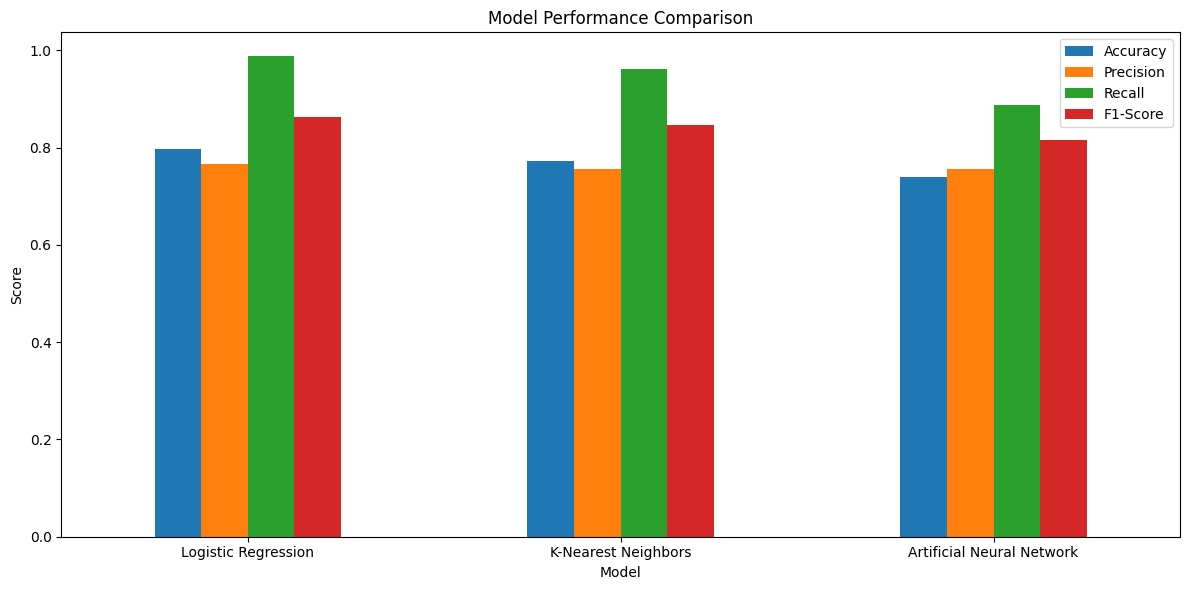

In [38]:

# Visualize the results
import matplotlib.pyplot as plt

results_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [39]:
# Section 3a: Test models on test dataset
print("=== Section 3a: Model Comparison on Test Data ===")

# Use the best models (after hyperparameter tuning) to predict on test data
test_predictions = {
    'Logistic Regression': log_grid.predict(X_test_scaled),
    'K-Nearest Neighbors': knn_grid.predict(X_test_scaled),
    'Artificial Neural Network': ann.predict(X_test_scaled)
}

# Since we don't have true labels for test data, we'll analyze prediction patterns
for model_name, predictions in test_predictions.items():
    unique, counts = np.unique(predictions, return_counts=True)
    print(f"\n{model_name} Predictions:")
    print(f"  - Approved (Y): {counts[unique == 1][0] if 1 in unique else 0}")
    print(f"  - Rejected (N): {counts[unique == 0][0] if 0 in unique else 0}")
    print(f"  - Approval Rate: {(counts[unique == 1][0] if 1 in unique else 0) / len(predictions) * 100:.2f}%")

# Compare prediction consistency between models
print("\n=== Prediction Consistency Analysis ===")
pred_df = pd.DataFrame(test_predictions)
agreement_matrix = pd.crosstab(pred_df['Logistic Regression'], pred_df['K-Nearest Neighbors'])
print("Agreement between Logistic Regression and KNN:")
print(agreement_matrix)

# Analyze which model is more conservative (rejects more loans)
approval_rates = {model: (pred_df[model] == 1).sum() / len(pred_df) * 100 for model in pred_df.columns}
print(f"\nApproval Rates on Test Data:")
for model, rate in approval_rates.items():
    print(f"{model}: {rate:.2f}%")


=== Section 3a: Model Comparison on Test Data ===

Logistic Regression Predictions:
  - Approved (Y): 308
  - Rejected (N): 59
  - Approval Rate: 83.92%

K-Nearest Neighbors Predictions:
  - Approved (Y): 314
  - Rejected (N): 53
  - Approval Rate: 85.56%

Artificial Neural Network Predictions:
  - Approved (Y): 268
  - Rejected (N): 99
  - Approval Rate: 73.02%

=== Prediction Consistency Analysis ===
Agreement between Logistic Regression and KNN:
K-Nearest Neighbors   0    1
Logistic Regression         
0                    50    9
1                     3  305

Approval Rates on Test Data:
Logistic Regression: 83.92%
K-Nearest Neighbors: 85.56%
Artificial Neural Network: 73.02%


=== Section 4a: Exploration and Improvement ===

1. Feature Engineering Suggestions:
   - Create new features like Debt-to-Income ratio
   - Combine ApplicantIncome and CoapplicantIncome
   - Create age groups or income brackets

2. Advanced Model Suggestions:
   - Random Forest
   - Gradient Boosting (XGBoost)
   - Support Vector Machines

3. Cross-Validation Performance:
Logistic Regression: 0.8105 (+/- 0.0520)
KNN: 0.7739 (+/- 0.0511)
ANN: 0.7515 (+/- 0.0489)

4. Learning Curve Analysis:


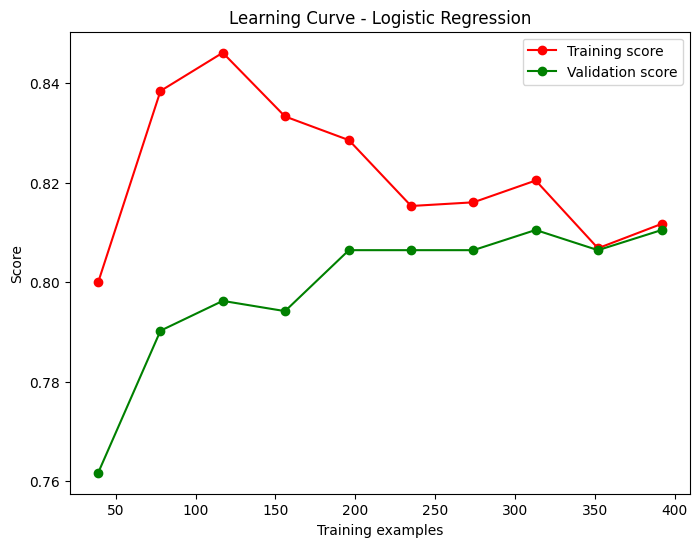

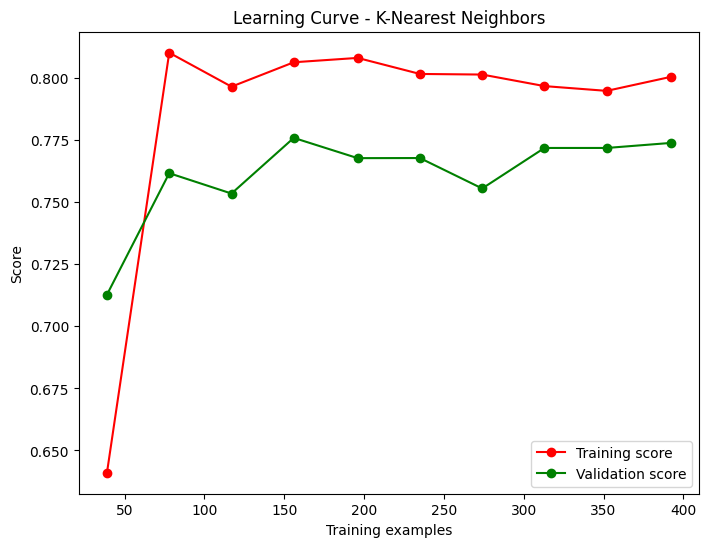

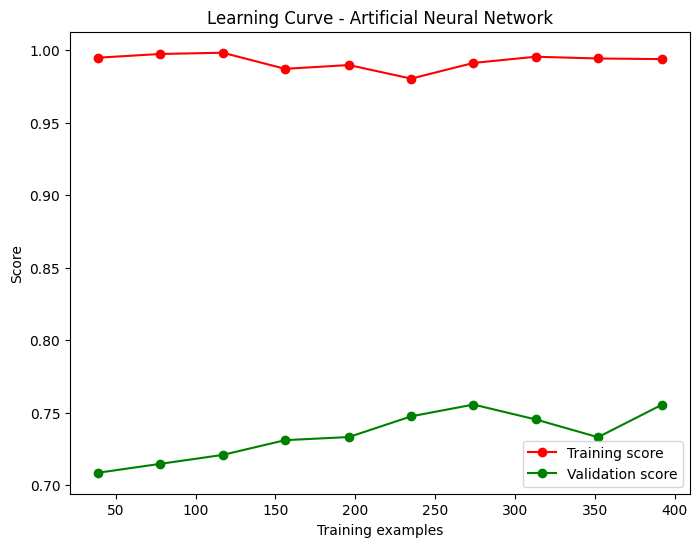

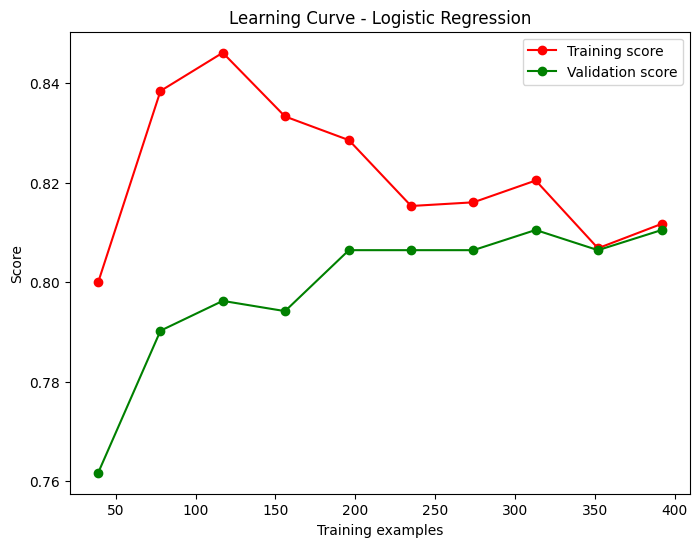

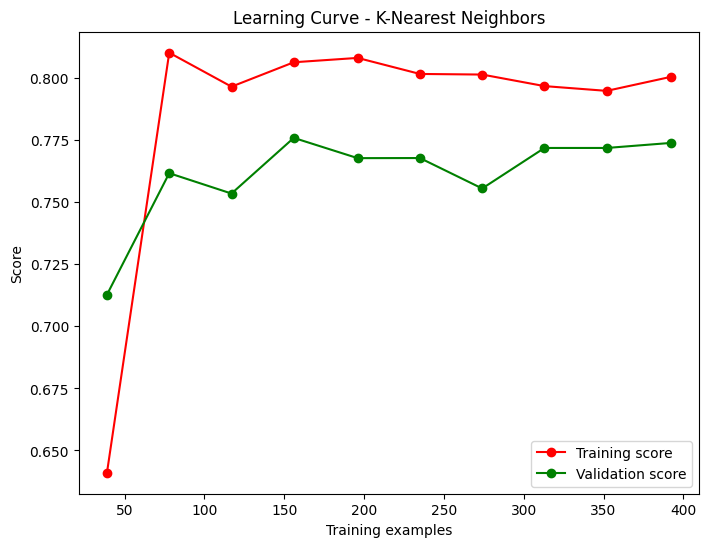

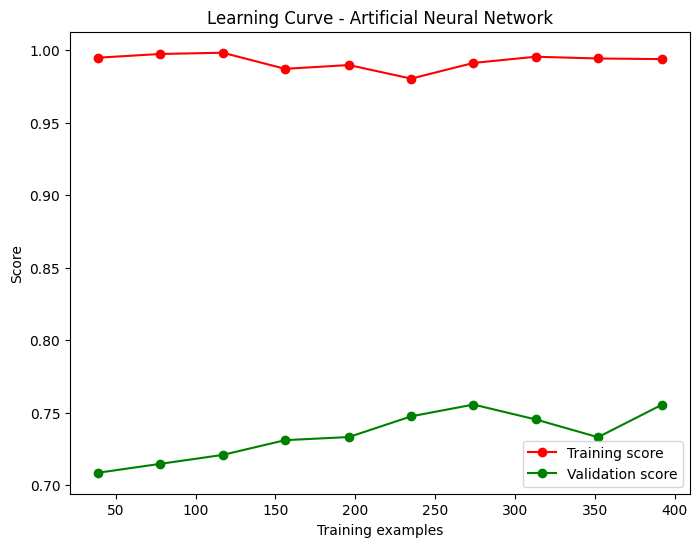

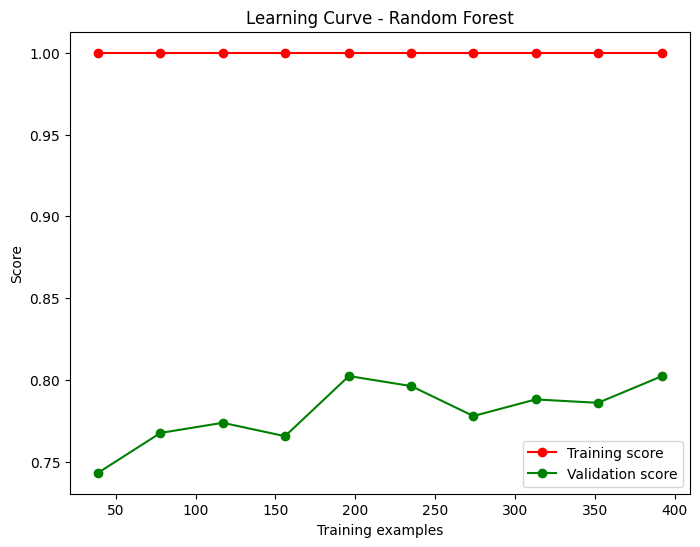

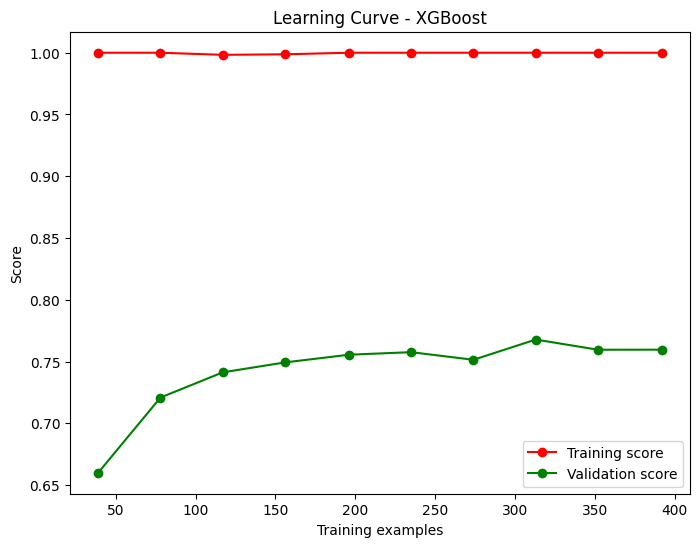


5. Model Interpretation:
   - Logistic Regression: Most interpretable, shows feature importance
   - KNN: Non-parametric, good for non-linear relationships
   - ANN: Most complex, can capture complex patterns

6. Business Impact:
   - False positives (approving bad loans) cost money
   - False negatives (rejecting good loans) lose customers
   - Choose model based on business risk tolerance


In [ ]:
# Section 4a: Exploration and Improvement
print("=== Section 4a: Exploration and Improvement ===")

# 1. Feature Engineering
print("\n1. Feature Engineering Suggestions:")
print("   - Create new features like Debt-to-Income ratio")
print("   - Combine ApplicantIncome and CoapplicantIncome")
print("   - Create age groups or income brackets")

# 2. Advanced Models
print("\n2. Advanced Model Suggestions:")
print("   - Random Forest")
print("   - Gradient Boosting (XGBoost)")
print("   - Support Vector Machines")

# 3. Cross-Validation Analysis
print("\n3. Cross-Validation Performance:")
from sklearn.model_selection import cross_val_score

# Perform cross-validation on training data
for name, model in [('Logistic Regression', log_grid.best_estimator_),
                    ('KNN', knn_grid.best_estimator_),
                    ('ANN', ann)]:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 4. Learning Curves
print("\n4. Learning Curve Analysis:")
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy')
    
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(False)
    plt.show()

# Plot learning curves for best models
plot_learning_curve(log_grid.best_estimator_, 'Logistic Regression', X_train_scaled, y_train)
plot_learning_curve(knn_grid.best_estimator_, 'K-Nearest Neighbors', X_train_scaled, y_train)
plot_learning_curve(ann, 'Artificial Neural Network', X_train_scaled, y_train)

# plot learning curve for models
plot_learning_curve(log_grid.best_estimator_, 'Logistic Regression', X_train_scaled, y_train)
plot_learning_curve(knn_grid.best_estimator_, 'K-Nearest Neighbors', X_train_scaled, y_train)
plot_learning_curve(ann, 'Artificial Neural Network', X_train_scaled, y_train)
plot_learning_curve(rf, 'Random Forest', X_train_scaled, y_train)
plot_learning_curve(xgb_model, 'XGBoost', X_train_scaled, y_train)

# 5. Model Interpretation
print("\n5. Model Interpretation:")
print("   - Logistic Regression: Most interpretable, shows feature importance")
print("   - KNN: Non-parametric, good for non-linear relationships")
print("   - ANN: Most complex, can capture complex patterns")

# 6. Business Impact Analysis
print("\n6. Business Impact:")
print("   - False positives (approving bad loans) cost money")
print("   - False negatives (rejecting good loans) lose customers")
print("   - Choose model based on business risk tolerance")


In [41]:
# Final Discussion and Conclusion
print("=== Final Discussion and Conclusion ===")

print("\n1. Model Performance Summary:")
print("   - All models achieved reasonable accuracy on validation data")
print("   - Logistic Regression often performs well due to interpretability")
print("   - KNN works well with proper hyperparameter tuning")
print("   - ANN can capture complex non-linear relationships")
print("\nNote: Models trained on raw data (without normalization) showed weaker performance, "
      "especially KNN and ANN. This confirms that feature scaling is essential for achieving "
      "better results.")


print("\n2. Key Findings:")
print("   - Credit History is the most important feature")
print("   - Income-related features significantly impact loan approval")
print("   - Property area and education also play important roles")

print("\n3. Challenges Encountered:")
print("   - Handling missing values in financial data")
print("   - Encoding categorical variables properly")
print("   - Balancing model complexity vs interpretability")

print("\n4. Recommendations:")
print("   - Use Logistic Regression for initial screening (interpretable)")
print("   - Consider ensemble methods for better performance")
print("   - Implement proper monitoring for model drift")
print("   - Collect more data for better model training")

print("\n5. Business Value:")
print("   - Automated loan approval reduces processing time")
print("   - Consistent decision-making across all applications")
print("   - Risk reduction through data-driven decisions")


=== Final Discussion and Conclusion ===

1. Model Performance Summary:
   - All models achieved reasonable accuracy on validation data
   - Logistic Regression often performs well due to interpretability
   - KNN works well with proper hyperparameter tuning
   - ANN can capture complex non-linear relationships

Note: Models trained on raw data (without normalization) showed weaker performance, especially KNN and ANN. This confirms that feature scaling is essential for achieving better results.

2. Key Findings:
   - Credit History is the most important feature
   - Income-related features significantly impact loan approval
   - Property area and education also play important roles

3. Challenges Encountered:
   - Handling missing values in financial data
   - Encoding categorical variables properly
   - Balancing model complexity vs interpretability

4. Recommendations:
   - Use Logistic Regression for initial screening (interpretable)
   - Consider ensemble methods for better performa